## Lung Cancer Focus

In [1]:
setwd("/Users/jacobbradley/Documents/CCG/Code")

### Packages

In [5]:
#install.packages("tidyverse")
library(tidyverse)
# Data Handling

if (!requireNamespace("BiocManager"))
    install.packages("BiocManager")
BiocManager::install()
library(BiocManager)
# General bioinformatics packages

library(BSgenome)
library(BSgenome.Hsapiens.UCSC.hg19)
# Human genome build GChr37

library("randomForest")
library(biomaRt)

Bioconductor version 3.8 (BiocManager 1.30.3), R 3.5.1 (2018-07-02)
Update old packages: 'annotate', 'assertthat', 'backports', 'BiocInstaller',
  'BiocManager', 'BiocParallel', 'Biostrings', 'biovizBase', 'broom', 'Cairo',
  'callr', 'caTools', 'checkmate', 'circlize', 'class', 'cli', 'clipr',
  'cluster', 'clusterProfiler', 'codetools', 'colorspace', 'cowplot', 'curl',
  'data.table', 'dbplyr', 'DESeq', 'devtools', 'DOSE', 'dplyr', 'e1071',
  'EDASeq', 'edgeR', 'ELMER', 'ensembldb', 'evaluate', 'forcats', 'foreign',
  'formatR', 'fs', 'gdsfmt', 'GenomeInfoDb', 'GenomicAlignments',
  'GenomicFeatures', 'gganimate', 'ggforce', 'ggplot2', 'ggpubr', 'ggsignif',
  'ggthemes', 'git2r', 'glue', 'gplots', 'grImport', 'gtable', 'Gviz', 'haven',
  'highr', 'Hmisc', 'htmlTable', 'httpuv', 'httr', 'igraph', 'imager',
  'IRdisplay', 'IRkernel', 'jomo', 'knitr', 'later', 'lattice', 'lazyeval',
  'limma', 'lme4', 'maftools', 'markdown', 'MASS', 'Matrix', 'mclust', 'mgcv',
  'mice', 'mitml', 'modelr

In [6]:
source("TMB_Funcs.txt")
# My Stuff!

path_name <- "/Volumes/CCG8/processed_data"
genome <- BSgenome.Hsapiens.UCSC.hg19
ensembl = useMart("ensembl", dataset = "hsapiens_gene_ensembl", host = "www.ensembl.org")
ensembl37 = useMart(host = "grch37.ensembl.org", biomart = "ENSEMBL_MART_ENSEMBL", dataset = "hsapiens_gene_ensembl")
select <- dplyr::select

In [7]:
three_cancer_data <- read_rds("/Users/jacobbradley/Documents/CCG/Data/three_cancer_data")
lung_data <- read_rds("/Users/jacobbradley/Documents/CCG/Data/lung_data")

lung_data[["training_data"]] <- lung_data[["training_data"]] %>% 
    filter(study == "nsclc_tcga_broad_2016")

lung_data[["test_data"]] <- lung_data[["test_data"]] %>% 
    filter(study == "nsclc_tcga_broad_2016")

### Running through RLL-applicable methods


In [9]:
rll_lung <- RLL_slide(maf_file = lung_data[["training_data"]], starting_window = 2**20, iterations = 11, zoom = 2, coverage = 1)
write_tsv(path = '/Users/jacobbradley/Documents/CCG/Data/rll_lung', rll_lung  %>%  unnest())
# rll_lung <- read_tsv("/Users/jacobbradley/Documents/CCG/Data/rll_lung", col_types = list(col_guess(), col_guess(), col_character(), col_guess(), col_guess(), col_guess())) %>% 
#     group_by(iteration, jump_length) %>% 
#     nest() %>% 
#     select(iteration, data, jump_length)


Iteration 1
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
X
Y
Iteration 2
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
X
Y
Iteration 3
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
X
Y
Iteration 4
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
X
Y
Iteration 5
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
X
Y
Iteration 6
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
X
Y
Iteration 7
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
X
Y
Iteration 8
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
X
Y
Iteration 9
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
X
Y
Iteration 10
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
X
Y
Iteration 11
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
X
Y


In [12]:
rll_lung %>% 
    select(-data)

iteration,jump_length
1,1048576
2,524288
3,262144
4,131072
5,65536
6,32768
7,16384
8,8192
9,4096
10,2048


In [19]:
rll_lung_windows <- RLL_windows(rll_lung, 2**21, max_windows = 1000, coverage = 1)

In [15]:
rll_lung_windows$windows[[2]]

chromosome,position,jumps,cluster
1,152043521,1,1
2,179306497,1,2


In [800]:
rll_lung_matrices <- RLL_matrices(lung_data[["training_data"]], rll_lung_windows, 2**20, coverage = 1)

In [801]:
rll_lung_models <- RLL_models(rll_lung_matrices)

In [802]:
rll_lung_test_matrices <- RLL_test_matrices(lung_data[["test_data"]], rll_lung_models)

### Doing so across a range of panel sizes

In [12]:
rll_lung_psa <- RLL_analyse_panel_size(rll_lung, lung_data, panel_sizes = seq(from = 2**20, to = 5*(2**19), by = 2**19), max_windows = 50)


panel size 1048576
making windows
making matrices


# A tibble: 968 x 2
   Window_1 Window_2
      <dbl>    <dbl>
 1        3        1
 2        0        0
 3        0        0
 4        3        0
 5        0        0
 6        0        1
 7        0        0
 8        0        0
 9       19       11
10        0        0
# ... with 958 more rows


making linear models
making random forest models
making test matrices
panel size 1572864
making windows
making matrices


# A tibble: 968 x 3
   Window_1 Window_2 Window_3
      <dbl>    <dbl>    <dbl>
 1        3        1        1
 2        0        0        0
 3        0        0        1
 4        3        0        0
 5        0        0        2
 6        0        1        0
 7        0        0        0
 8        0        0        0
 9       19       11        6
10        0        0        0
# ... with 958 more rows


making linear models
making random forest models
making test matrices
Warning message in if (is.na(rll_objects)) {:
“the condition has length > 1 and only the first element will be used”panel size 2097152
making windows
making matrices


# A tibble: 968 x 3
   Window_1 Window_2 Window_3
      <dbl>    <dbl>    <dbl>
 1        3        1        1
 2        0        0        0
 3        0        0        1
 4        3        1        0
 5        0        0        2
 6        0        2        0
 7        0        0        0
 8        0        0        0
 9       19       17        6
10        0        2        0
# ... with 958 more rows


making linear models
making random forest models
making test matrices
Warning message in if (is.na(rll_objects)) {:
“the condition has length > 1 and only the first element will be used”panel size 2621440
making windows
making matrices


# A tibble: 968 x 4
   Window_1 Window_2 Window_3 Window_4
      <dbl>    <dbl>    <dbl>    <dbl>
 1        2        3        1        1
 2        0        0        0        0
 3        2        0        0        1
 4        1        3        1        0
 5        1        0        0        2
 6        2        0        2        0
 7        0        0        0        0
 8        2        0        0        0
 9        2       19       17        6
10        0        0        2        0
# ... with 958 more rows


making linear models
making random forest models
making test matrices
Warning message in if (is.na(rll_objects)) {:
“the condition has length > 1 and only the first element will be used”

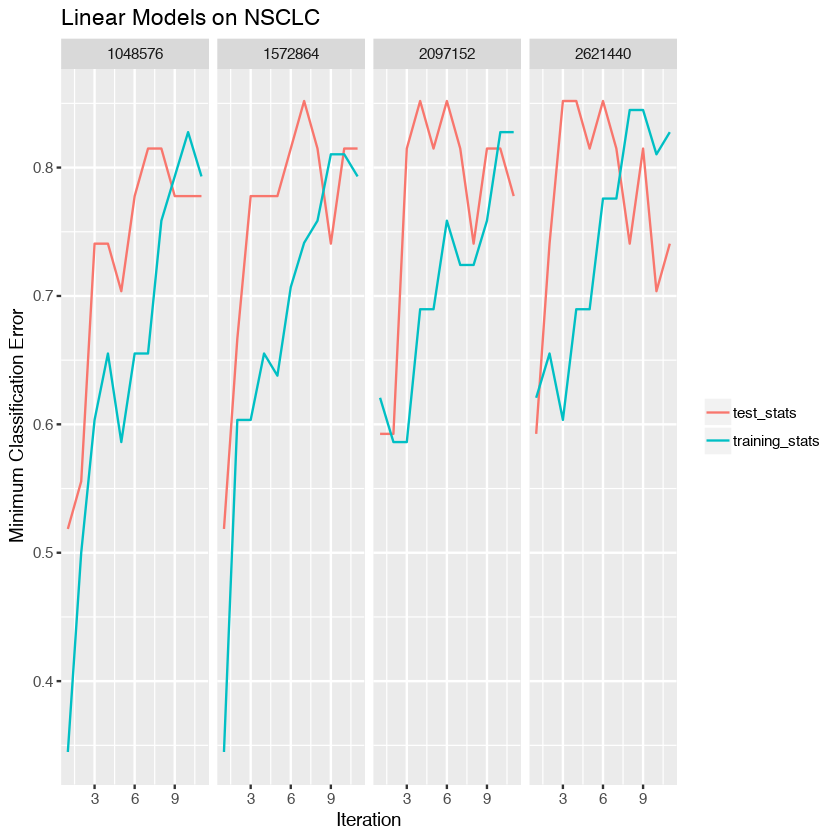

In [28]:
RLL_panel_size_test(rll_lung_psa, type = "Cmin") %>% 
    ggplot(aes(x = iteration, y = stat, colour = test_train)) + 
    geom_line() + facet_grid(~size) + theme(legend.title = element_blank()) +
    labs(x = "Iteration", y = "Minimum Classification Error", title = "Linear Models on NSCLC")

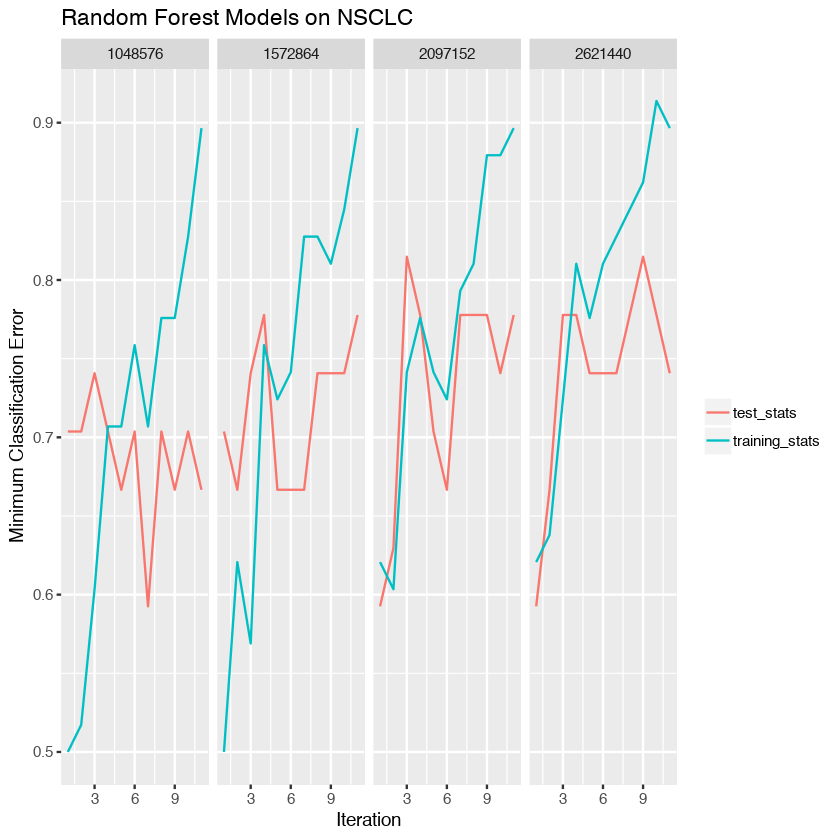

In [30]:
RLL_panel_size_test(rll_lung_psa, type = "Cmin", which_model = "RF") %>% 
    ggplot(aes(x = iteration, y = stat, colour = test_train)) + 
    geom_line() + facet_grid(~size) + theme(legend.title = element_blank()) +
    labs(x = "Iteration", y = "Minimum Classification Error", title = "Random Forest Models on NSCLC")

### Looking at model fit across panel sizes

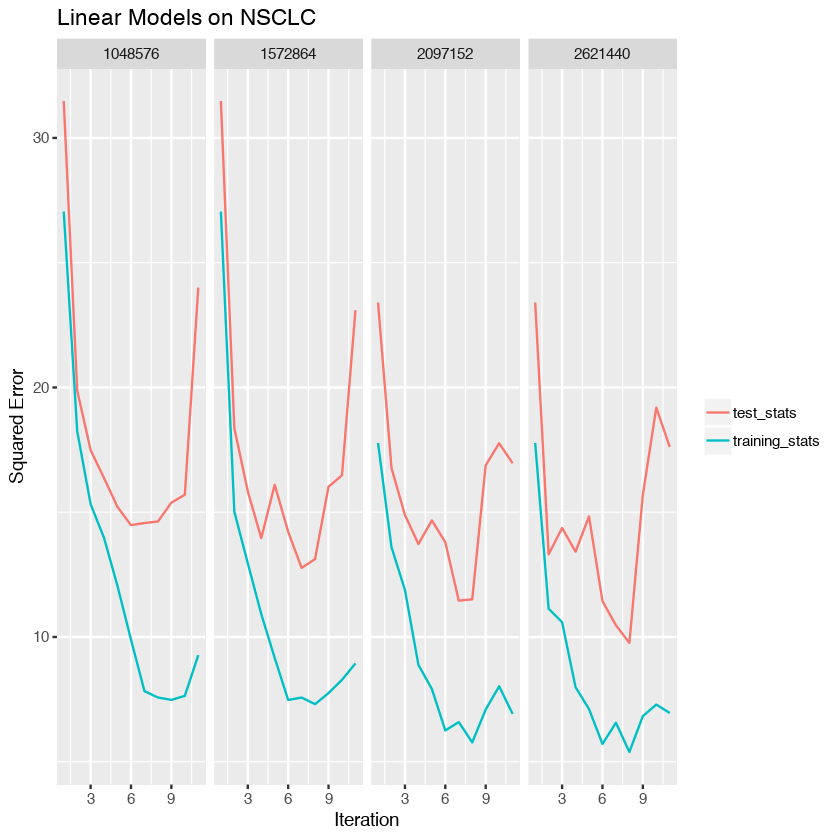

In [694]:
RLL_panel_size_test(rll_lung_psa, type = "D") %>% 
    ggplot(aes(x = iteration, y = stat, colour = test_train)) + 
    geom_line() + facet_grid(~size) + theme(legend.title = element_blank()) +
    labs(x = "Iteration", y = "Squared Error", title = "Linear Models on NSCLC")

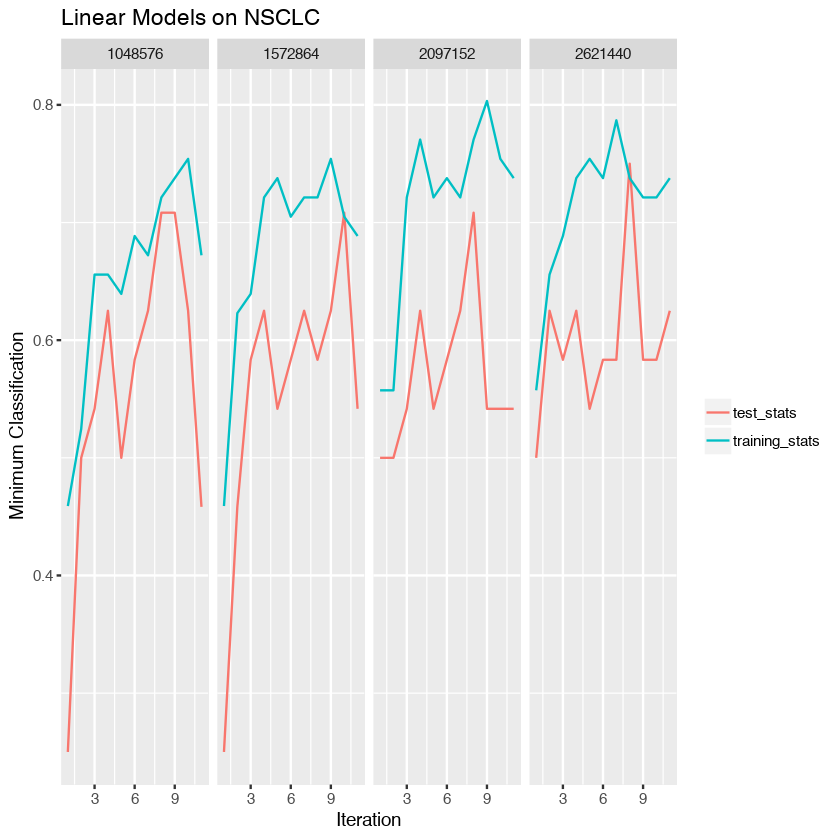

In [697]:
RLL_panel_size_test(rll_lung_psa, type = "Cmin") %>% 
    ggplot(aes(x = iteration, y = stat, colour = test_train)) + 
    geom_line() + facet_grid(~size) + theme(legend.title = element_blank()) +
    labs(x = "Iteration", y = "Minimum Classification", title = "Linear Models on NSCLC") 
    

In [787]:
(rll_lung_psa$data[[1]]$matrices[[1]] %>% 
    select(TMB) %>% 
    filter(TMB>20) %>% 
    nrow())/
(rll_lung_psa$data[[1]]$matrices[[1]] %>% 
    select(TMB) %>% 
    nrow())

[1] 0.06301653

### Generalised Linear Models?

In [783]:
get_glmModel <- function(matrix) {
    
    formula <- matrix %>% 
        select(starts_with("Window")) %>% 
        select(which(colSums(.) > 0)) %>% 
        colnames() %>% 
        paste(collapse = "+") %>% 
        paste("TMB ~", .) %>% 
        as.formula()
    
    olm_fit <- lm(formula, data = matrix)
    start <- as.numeric(summary(olm_fit)$coefficients[,"Estimate"])
    
    fit <- glm(formula, family = Gamma(link = log), data = matrix, start = start)
    
    return(fit)  
}

In [784]:
predict(get_glmModel(rll_lung_psa$data[[1]]$matrices[[4]])

Warning message:
“glm.fit: algorithm did not converge”


Call:  glm(formula = formula, family = Gamma(link = log), data = matrix, 
    start = start)

Coefficients:
(Intercept)     Window_1     Window_2     Window_3     Window_4     Window_5  
     1.0739       0.1583       0.1368       0.2160       0.1690       0.2029  
   Window_6  
     0.1763  

Degrees of Freedom: 967 Total (i.e. Null);  961 Residual
Null Deviance:	    1471 
Residual Deviance: 918.1 	AIC: 5221

### Looking for improvement with Random Forests?

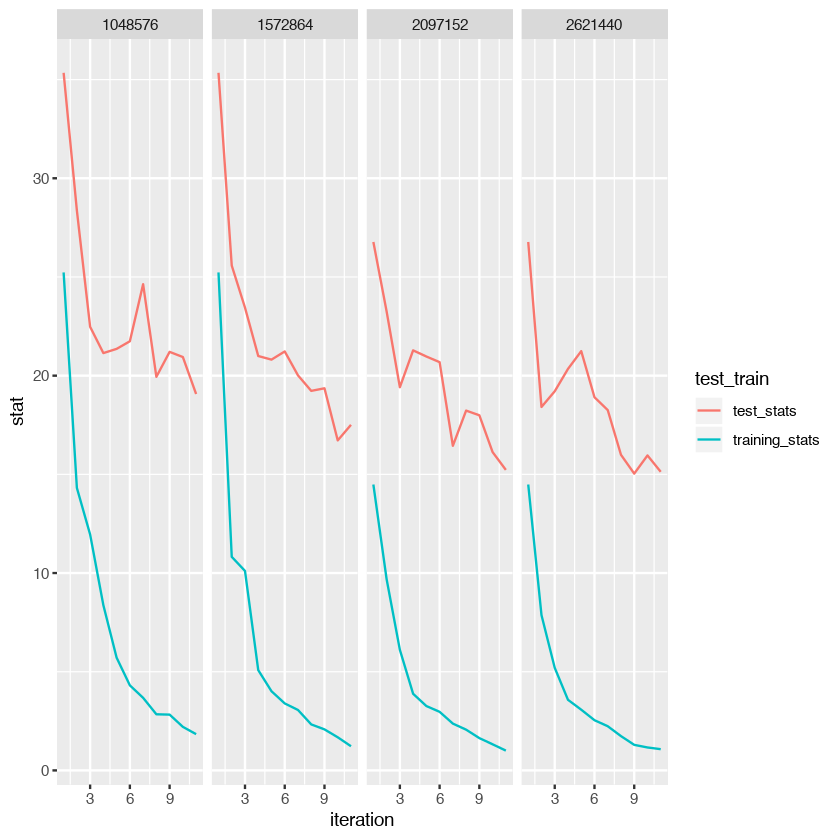

In [688]:
RLL_panel_size_test(rll_lung_psa, type = "D", which_model = "RF") %>% 
    ggplot(aes(x = iteration, y = stat, colour = test_train)) + geom_line() + facet_grid(~size)

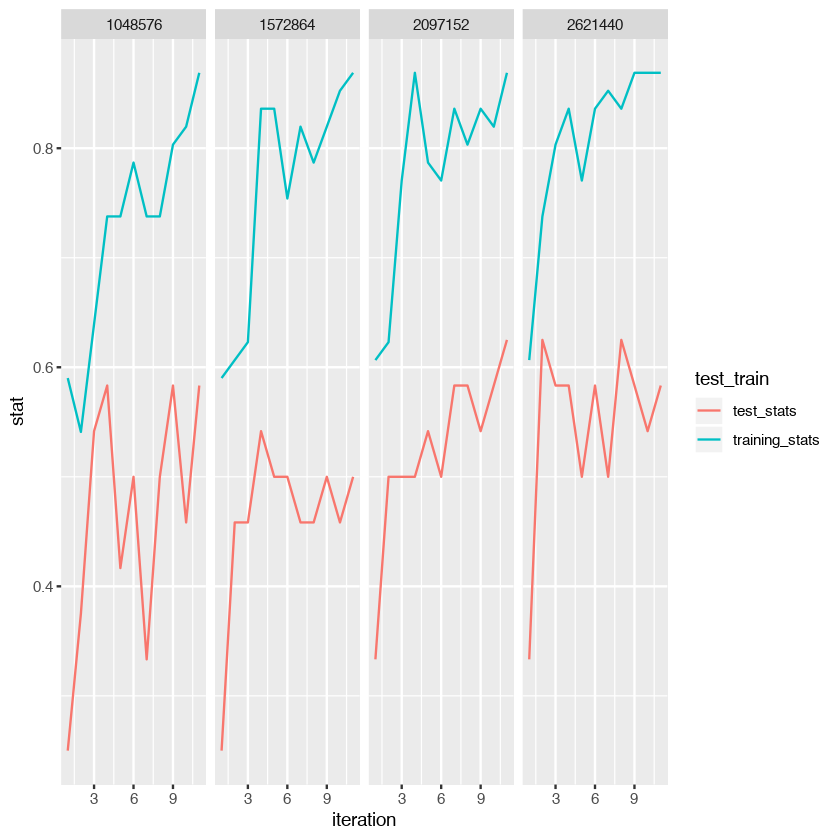

In [689]:
RLL_panel_size_test(rll_lung_psa, type = "Cmin", which_model = "RF") %>% 
    ggplot(aes(x = iteration, y = stat, colour = test_train)) + geom_line() + facet_grid(~size)

### Not yet...

### SVMs?

In [31]:
library(e1071)

Warning message:
“package ‘e1071’ was built under R version 3.5.2”

In [41]:
testModel(get_svmModel(rll_lung_psa$data[[1]]$matrices[[6]]), rll_lung_psa$data[[1]]$matrices[[6]], type = "Cmin")
testModel(get_fModel(rll_lung_psa$data[[1]]$matrices[[6]]), rll_lung_psa$data[[1]]$matrices[[6]], type = "Cmin")
testModel(getModel(rll_lung_psa$data[[1]]$matrices[[6]]), rll_lung_psa$data[[1]]$matrices[[6]], type = "Cmin")

[1] 0.8275862

[1] 0.7758621

[1] 0.6551724

In [42]:
testModel(get_svmModel(rll_lung_psa$data[[1]]$matrices[[6]]), rll_lung_psa$data[[1]]$test_matrices[[6]], type = "Cmin")
testModel(get_fModel(rll_lung_psa$data[[1]]$matrices[[6]]), rll_lung_psa$data[[1]]$test_matrices[[6]], type = "Cmin")
testModel(getModel(rll_lung_psa$data[[1]]$matrices[[6]]), rll_lung_psa$data[[1]]$test_matrices[[6]], type = "Cmin")

[1] 0

[1] 0.6296296

[1] 0.7777778

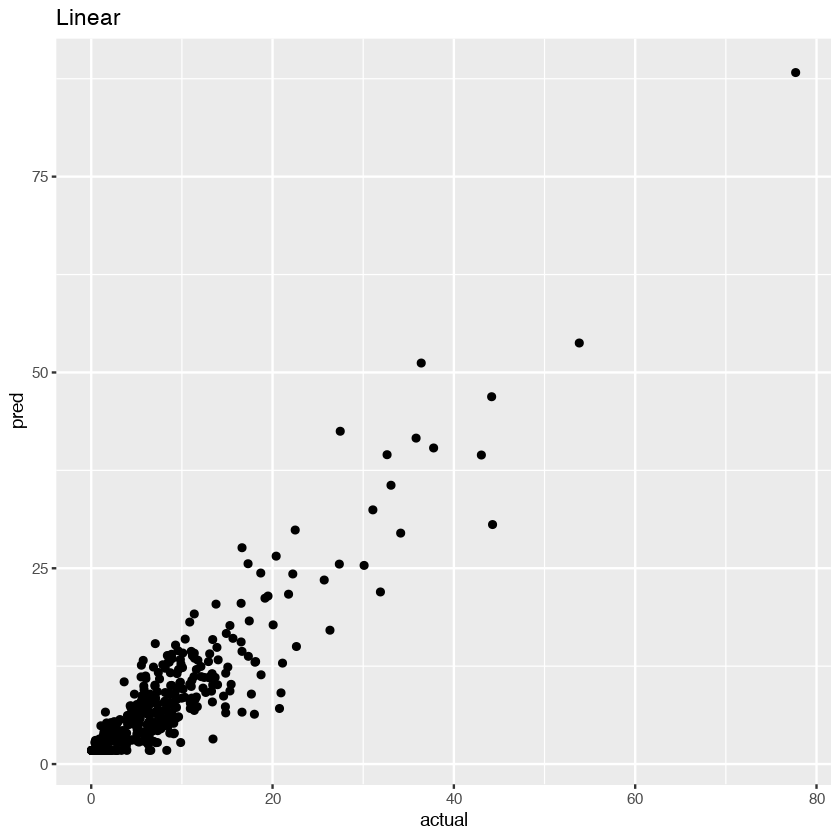

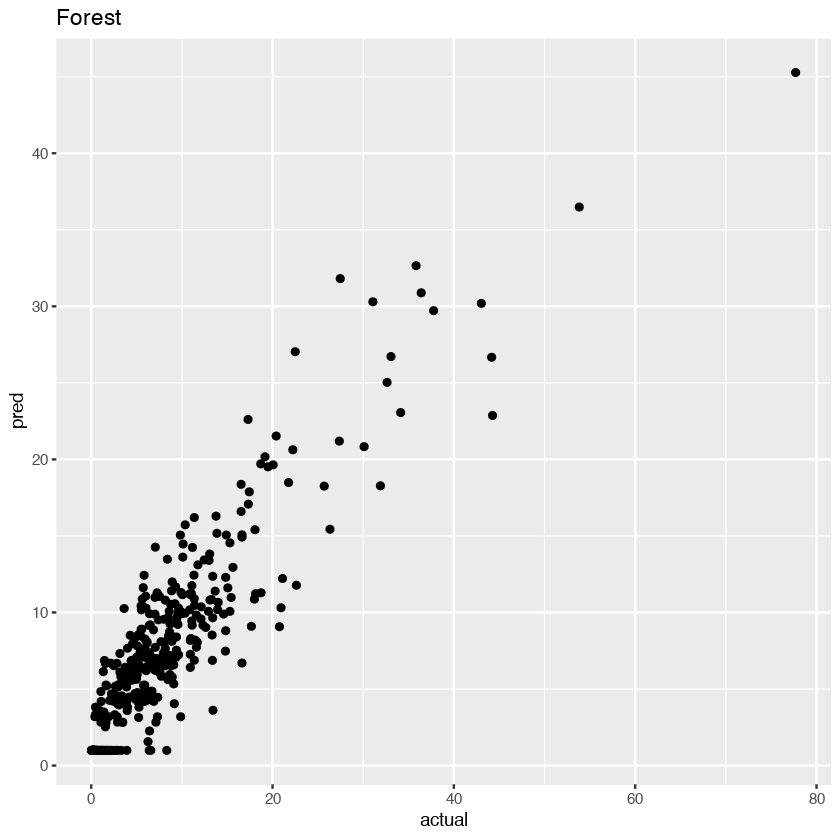

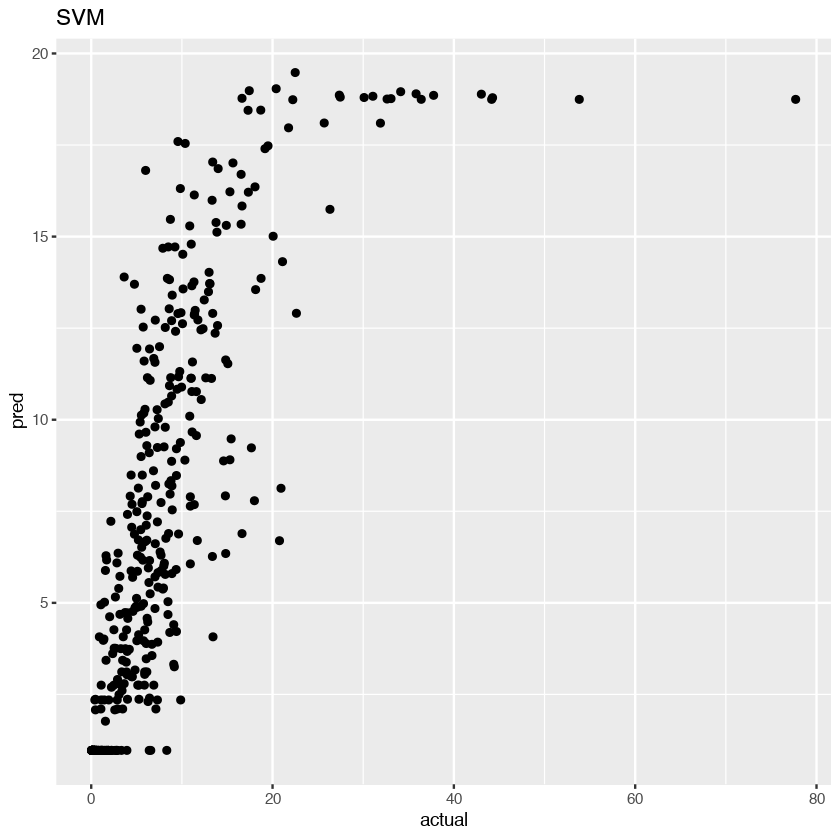

In [48]:
tibble(pred = predict(getModel(rll_lung_psa$data[[1]]$matrices[[6]]), rll_lung_psa$data[[1]]$test_matrices[[6]]), actual = rll_lung_psa$data[[1]]$test_matrices[[6]]$TMB) %>% 
    ggplot(aes(x = actual, y = pred)) + geom_point() + ggtitle("Linear")

tibble(pred = predict(get_fModel(rll_lung_psa$data[[1]]$matrices[[6]]), rll_lung_psa$data[[1]]$test_matrices[[6]]), actual = rll_lung_psa$data[[1]]$test_matrices[[6]]$TMB) %>% 
    ggplot(aes(x = actual, y = pred)) + geom_point() + ggtitle("Forest")

tibble(pred = predict(get_svmModel(rll_lung_psa$data[[1]]$matrices[[6]]), rll_lung_psa$data[[1]]$test_matrices[[6]]), actual = rll_lung_psa$data[[1]]$test_matrices[[6]]$TMB) %>% 
    ggplot(aes(x = actual, y = pred)) + geom_point() + ggtitle("SVM")


In [1]:
?predict